In [1]:
import pyxdf
import matplotlib.pyplot as plt
import numpy as np
import mne

### xdf file, recorded through lsl record

In [33]:
# read xdf file 
data, header = pyxdf.load_xdf('diod_singleEEG.xdf')
# multiple EEG
data_m, header_m = pyxdf.load_xdf('diod_multipleEEG.xdf')

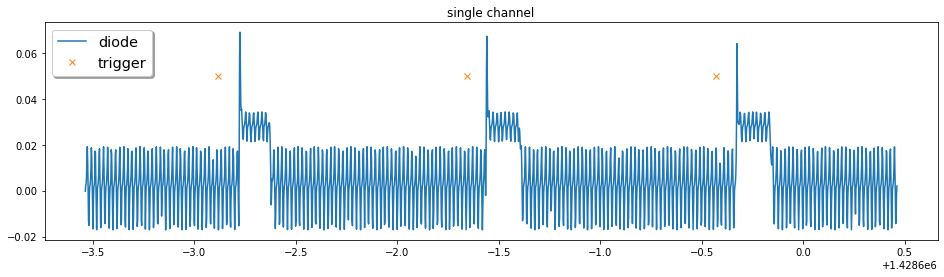

In [31]:
# plot the first 3 samples 
plt.figure(figsize=(16, 4))
plt.plot(data[2]['time_stamps'][3000:5000], data[2]['time_series'][:,0][3000:5000], label='diode')
plt.plot(data[1]['time_stamps'][0:3], data[1]['time_series'][0:3] - 0.95, 'x', label='trigger')
plt.title("single channel")
plt.legend(loc='upper left', shadow=True, fontsize='x-large')

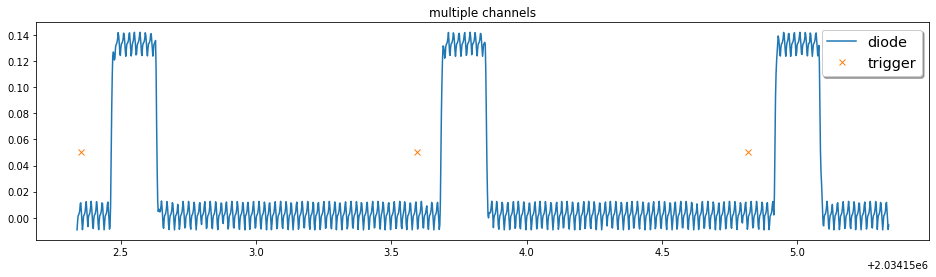

In [20]:
# multiple EEG - plot the first 3 samples 
plt.figure(figsize=(16, 4))
plt.plot(data_m[0]['time_stamps'][6000:7500], data_m[0]['time_series'][:,64][6000:7500], label='diode')
plt.plot(data_m[1]['time_stamps'][0:3], data_m[1]['time_series'][0:3] - 0.95, 'x', label='trigger')
plt.title("multiple channels")
plt.legend(loc='best', shadow=True, fontsize='x-large')

In [27]:
def get_diode_activation_times(threshold, brightness, times):
    activations = []
    flag = 1
    for bright, time in zip(brightness, times):
        if flag and bright > threshold:
            activations.append(time)
            flag = 0
        if bright < threshold:
            flag = 1
    return activations

In [40]:
activations = get_diode_activation_times(0.04, data_m[0]['time_series'][:,64], data_m[0]['time_stamps'])
latency_arr = activations - data[1]['time_stamps']
latency_arr /= 1000


array([605.55534964, 605.55534164, 605.55534764, 605.55534964,
       605.55534164])

Mean 605555.3022433044
Std 0.031129309350428812
Min 605555.2476424417
Max 605555.3496442451


Text(0, 0.5, 'Count')

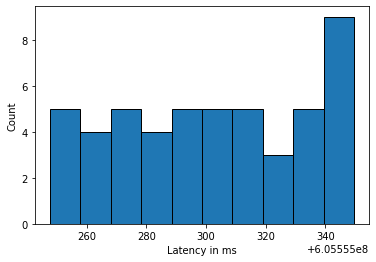

In [41]:
# plot stats 
print('Mean',(latency_arr).mean())
print('Std',(latency_arr).std())
print('Min',(latency_arr).min())
print('Max',(latency_arr).max())
plt.hist(latency_arr*1000,bins=10,edgecolor='k')

plt.xlabel('Latency in ms')
plt.ylabel('Count')

### edf file, recorded through EEGO

In [7]:
# read edf file
dataEDF = mne.io.read_raw_edf('exp2.edf')
raw_data = dataEDF.get_data()
events = mne.events_from_annotations(dataEDF)
info = dataEDF.info
channels = dataEDF.ch_names

Extracting EDF parameters from c:\Users\shakeda\Documents\Yoav Maya Project\diod_exp\exp2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Used Annotations descriptions: [' 1']


Text(0.5, 1.0, 'single channel')

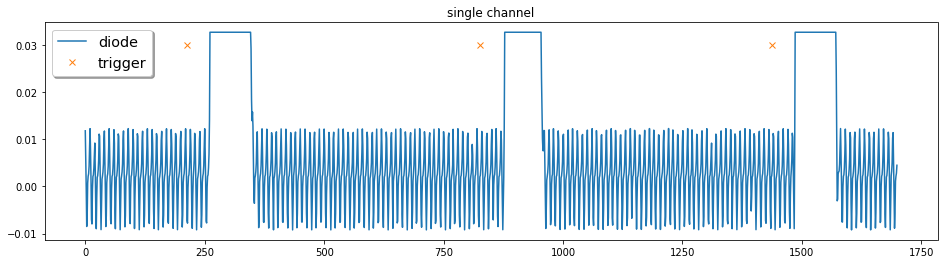

In [15]:
# plot edf data - diod and trigers via EEGO
x = np.array(events[0])[:,0]
y = len(x)
plt.figure(figsize=(16, 4))
plt.plot(raw_data[0][9800:11500], label='diode')
plt.plot(x[4:7] - 9800 ,[0.03] * 3, 'x', label='trigger')
plt.legend(loc='upper left', shadow=True, fontsize='x-large')
plt.title("single channel")

In [10]:
# read edf file - multiple EEG
dataEDF_m = mne.io.read_raw_edf('diod_multipleEEG_Segment_1.edf')
raw_data_m = dataEDF_m.get_data()
events_m = mne.events_from_annotations(dataEDF_m)
info_m = dataEDF_m.info
channels_m = dataEDF_m.ch_names

Extracting EDF parameters from c:\Users\shakeda\Documents\Yoav Maya Project\diod_exp\diod_multipleEEG_Segment_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Used Annotations descriptions: [' 1']


Text(0.5, 1.0, 'multiple channels')

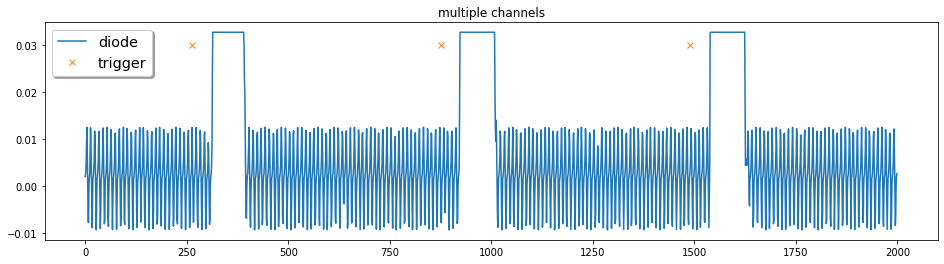

In [11]:
# plot edf data with multiple EEG- diod and trigers via EEGO
x = np.array(events_m[0])[:,0]
y = len(x)
plt.figure(figsize=(16,4))
plt.plot(raw_data_m[64][10000:12000], label='diode')
plt.plot(x[3:6] - 10000, [0.03] * 3, 'x', label='trigger')
legend = plt.legend(loc='upper left', shadow=True, fontsize='x-large')
plt.title("multiple channels")

In [21]:
# threshold of the diod signal to find when active eego
activation_diod_ts = []
flag = 1
threshold = 0.02  

for i in range(len(raw_data[64])):
    if flag:
        if raw_data[64][i] > threshold:
            activation_diod_ts.append(i)
            flag = 0
    if raw_data[64][i] < threshold:
        flag = 1

IndexError: index 64 is out of bounds for axis 0 with size 1

In [ ]:
# diffrence from diod actavation and trigger 
diss = np.array(activation_diod_ts) - np.array(events[0])[:,0]
diss=diss / 500.0

In [ ]:
# diffrence from diod actavation and trigger 
diss = np.array(activation_diod_ts) - data_m[1]['time_stamps']

In [ ]:
# plot stats 
print('Mean',(diss).mean())
print('Std',(diss).std())
print('Min',(diss).min())
print('Max',(diss).max())
plt.hist(diss * 1000, bins=10, edgecolor='k')

plt.xlabel('Latency in ms')
plt.ylabel('Count')